# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Thoriq Ibadurrohman
- Email: thoriq312@gmail.com
- Id Dicoding: thoriqib

Pengerjaan menggunakan google colab

## Variabel

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaan Bisnis

- Bagaimana antusiasme peminjam sepeda dalam 2 tahun terakhir?
- Bagaimana hubungan antara suhu dan jumlah sewa sepeda harian ?
- Jumlah peminjaman sepeda tertinggi pada hari dengan kondisi cuaca apa?

## Menyaipkan semua library yang dibuthkan

Mengimport pandas, numpy, matplotlib dan seaborn

In [1]:
#Import necessary libraries
#for DA and array processing
import pandas as pd

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Melakukan import data day.csv. Data disimpan di folder content. Namun data akan terhapus ketika menutup colab sehingga perlu upload kembali data day.csv ketika ingin mengimport data.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/thoriqib/bike-sharing-analysis/master/data/day.csv", delimiter=",")
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

Mengubah tipe data dteday ke dalam datetime

In [4]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Pengecekan jumlah baris, jumlah kolom, missing value, duplicate value, head, dan tipe data

In [5]:
pd.set_option('display.max_columns', None)
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" HEAD ".center(125,'-'))
    print(df.head(5))
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:731
Columns:16
------------------------------------------------------- MISSING VALUES ------------------------------------------------------
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
------------------------------------------------------------ HEAD -----------------------------------------------------------
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0  

Tidak ada missing value, data duplikat dan tipe data sudah sesuai

Pengecekan Outlier

In [6]:
#Checking ouliers in Target varibale "cnt".

Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower_bound: ", lower_bound,"upper_bound: ", upper_bound)

lower_bound:  -1054.0 upper_bound:  10162.0


In [7]:
# Identify the outliers
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Cleaning Data

Karena data sudah bersih, tidak dilakukan cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
df.describe(include="all")

<ipython-input-8-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Melihat distribusi jumlah rental sepeda menurut hari dengan boxplot

Text(0.5, 1.0, 'Distribusi rental sepeda menurut hari')

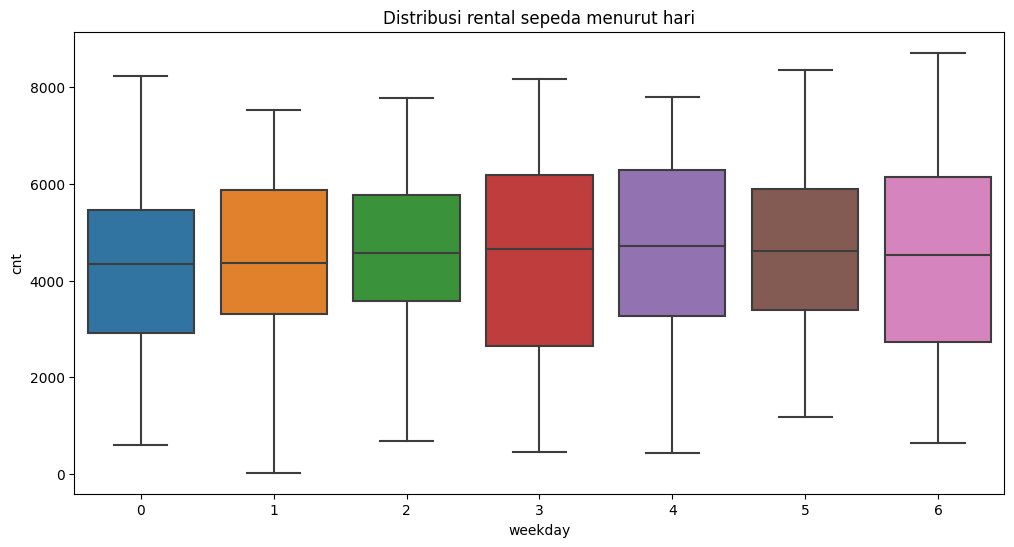

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Distribusi rental sepeda menurut hari')

Melihat distribusi jumlah rental sepeda menurut musim dengan boxplot

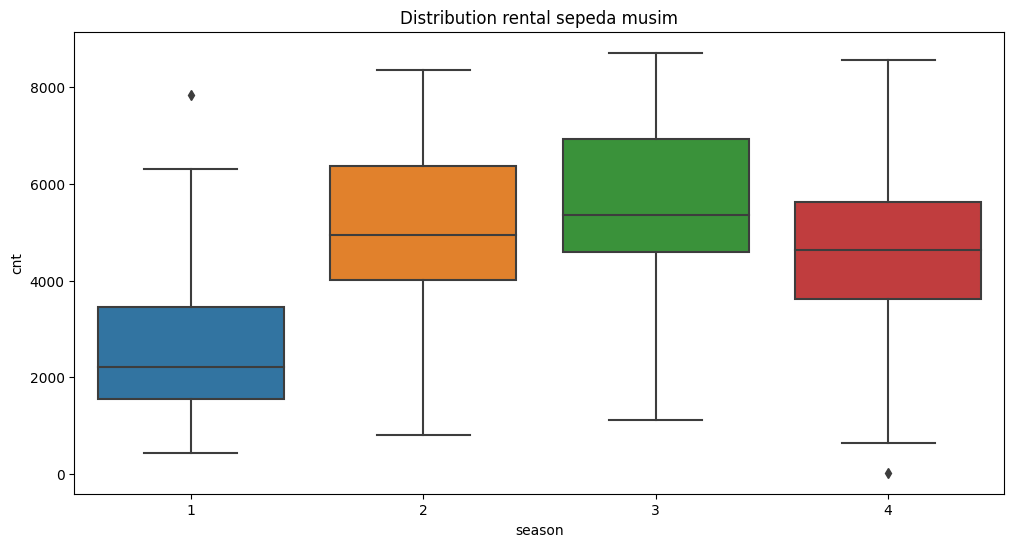

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution rental sepeda musim')
plt.show()

Mencari nilai korelasi antara atemp dengan cnt dengan korelasi pearson

In [11]:
from scipy.stats import pearsonr
corr, _  = pearsonr(df['atemp'], df['cnt'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.631


Korelasi Pearson sebesar 0.631 menunjukkan hubungan linear positif antara dua variabel. Angka 0.631 mencerminkan kekuatan dan arah hubungan. Nilai korelasi antara 0.6 hingga 0.8 menunjukkan hubungan yang moderat hingga kuat antara variabel. Dalam konteks ini, korelasi 0.631 menandakan bahwa ketika satu variabel naik, kemungkinan besar variabel lainnya juga akan naik, dan sebaliknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimana antusiasme peminjam sepeda dalam 2 tahun terakhir?**


Membuat dataset baru yang isi variabel dteday nya hanya tahun dan bulan

In [12]:
df1 = df
df1['dteday'] = df1['dteday'].dt.strftime('%Y-%m')
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Melakukan grouping data tahun-bulan dengan jumlah penyewaan sepeda per bulannya

In [13]:
monthly_rental_df = df1.groupby(by='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_df.head()

,instant,cnt
dteday,,
2011-01,31,38189
2011-02,28,48215
2011-03,31,64045
2011-04,30,94870
2011-05,31,135821


Membuat line chart untuk memvisualisasikan jumlah penyewaan sepeda per bulan selama tahun 2011-2012

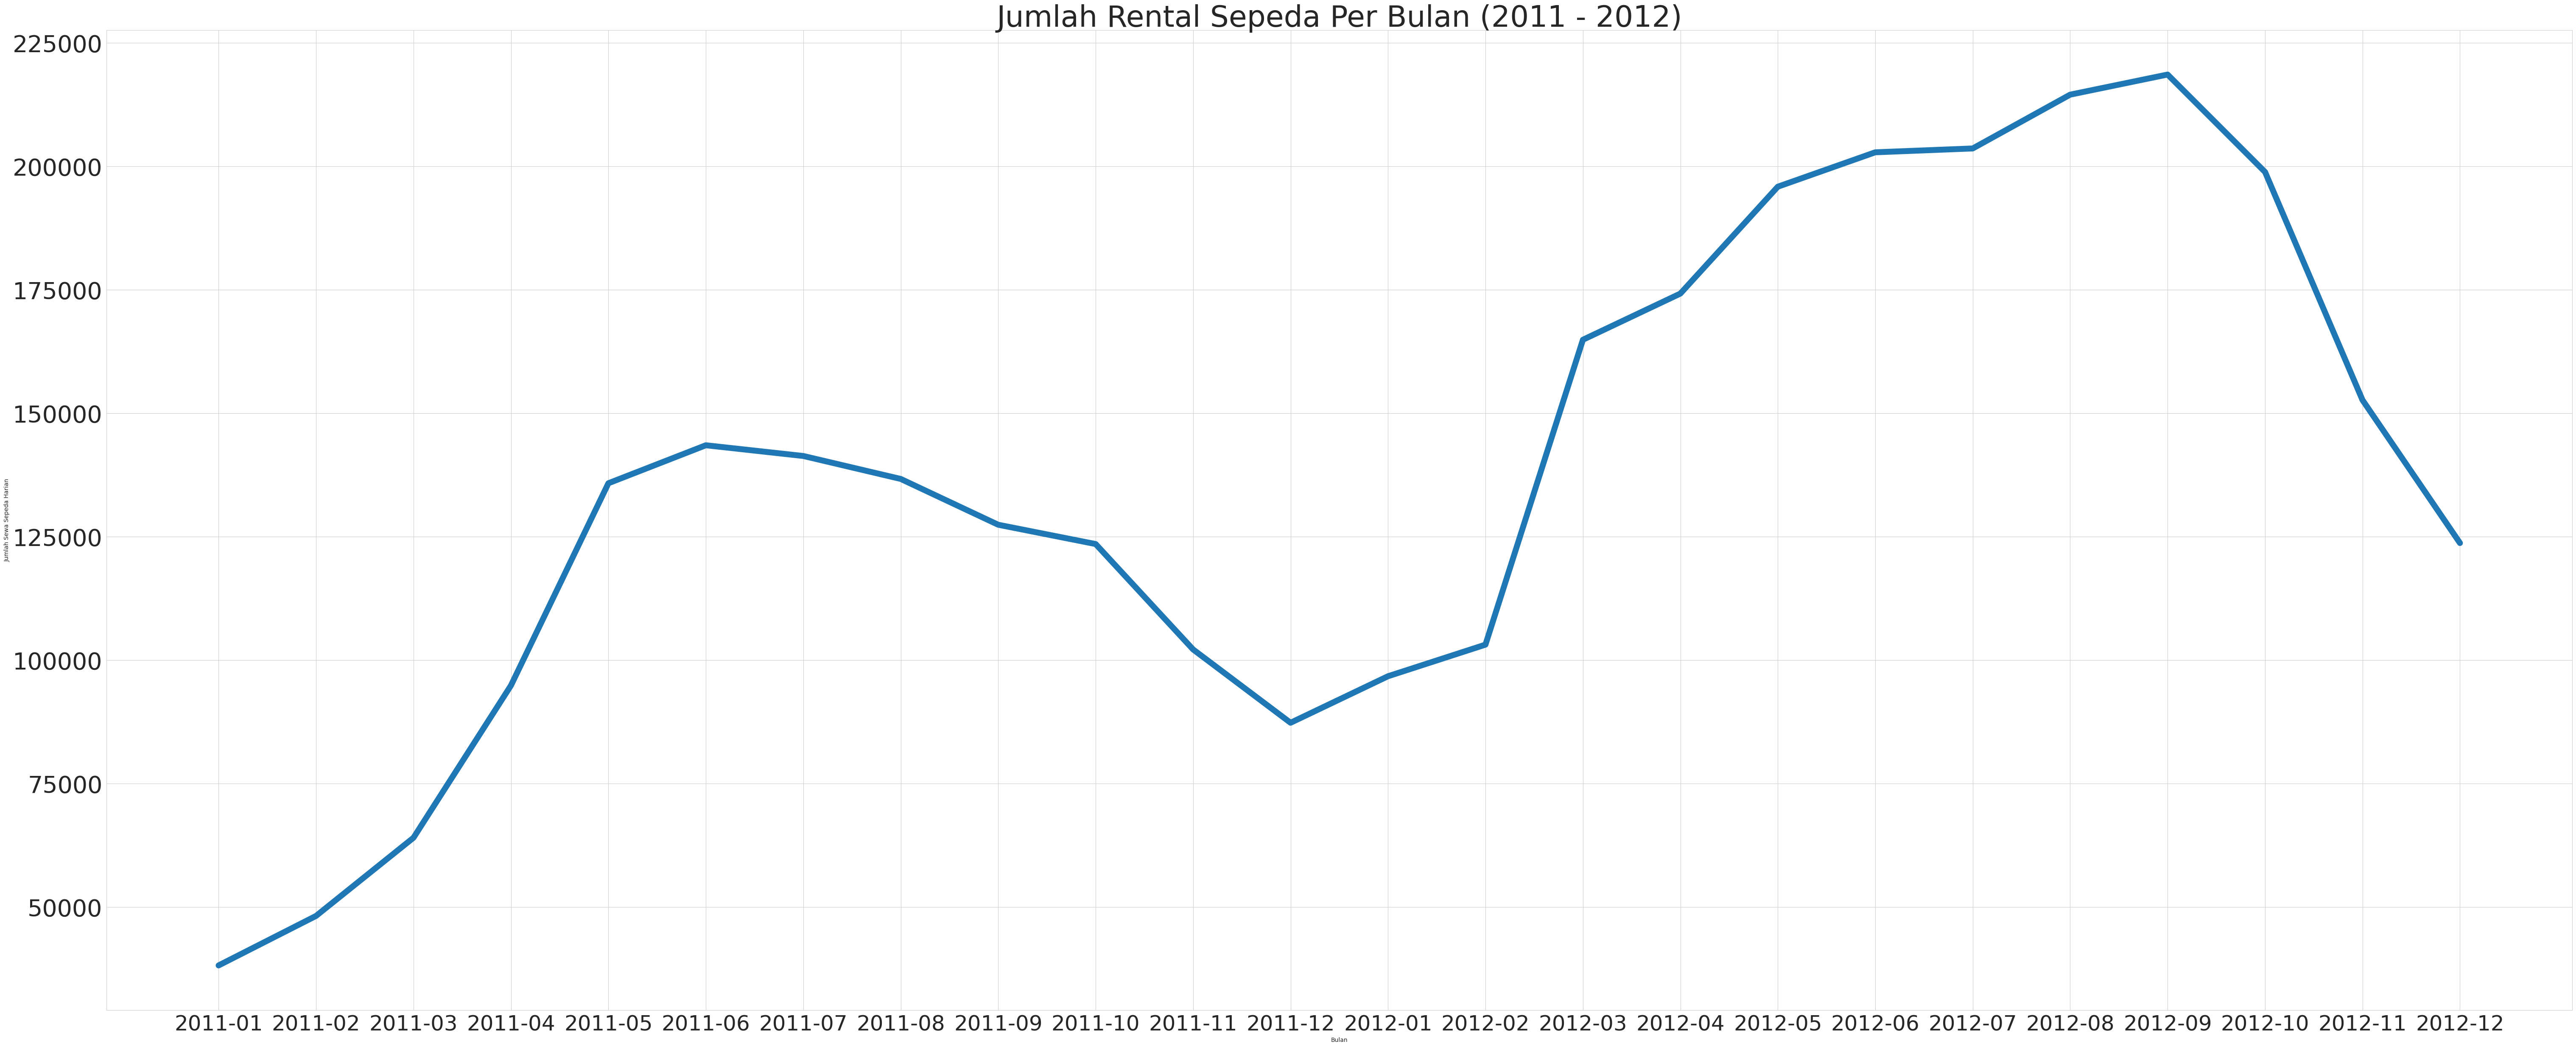

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(75, 30))
sns.lineplot(x=monthly_rental_df.index, y=monthly_rental_df["cnt"], linewidth = 10)
plt.title("Jumlah Rental Sepeda Per Bulan (2011 - 2012)", loc="center", fontsize=50)
plt.xticks(fontsize=36)
plt.yticks(fontsize=40)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

### Pertanyaan 2:

**Bagaimana hubungan antara suhu dan jumlah sewa sepeda harian ?**

Mencari hubungan antara variabel atemp dengan cnt dengan scatter plot

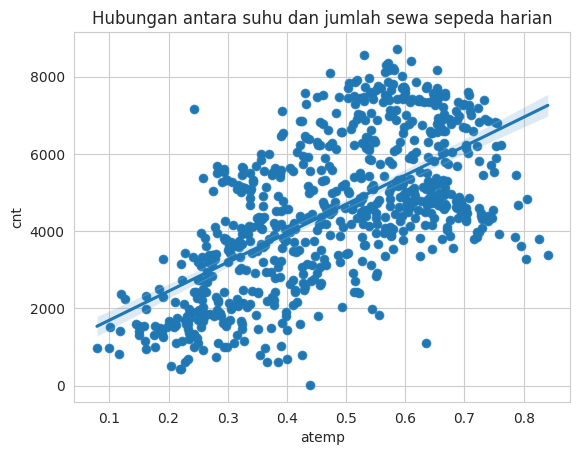

In [15]:
sns.scatterplot(x='atemp', y='cnt', data=df)
sns.regplot(x='atemp', y='cnt', data=df)
plt.title('Hubungan antara suhu dan jumlah sewa sepeda harian')
plt.show()

### Pertanyaan 3:

**Jumlah peminjaman sepeda tertinggi pada hari dengan kondisi cuaca apa?**

Melakukan grouping data musim berdasarkan jumlah rental sepeda dan memvisualisasikannya dalam bar chart

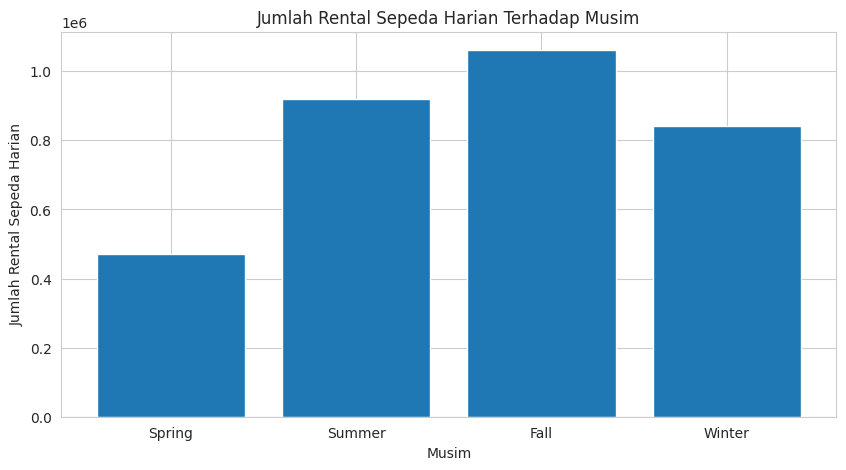

In [16]:
seasonal_data = df1.groupby('season')['cnt'].sum()

season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.figure(figsize=(10, 5))
plt.bar(season_names, seasonal_data)
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental Sepeda Harian')
plt.title('Jumlah Rental Sepeda Harian Terhadap Musim')
plt.show()

## Conclusion

**Bagaimana antusiasme peminjam sepeda dalam 2 tahun terakhir?**
- Antusiasme penyewa sepeda terus meningkat dari waktu ke waktu. Hal ini terlihat dari tren positif jumlah penyewaan dari Januari 2011 hingga Desember 2012. Jika dilihat dari line chart, di setiap tahunnya pada bulan mei-september adalah puncak dari jumlah penyewaan sepeda

**Bagaimana hubungan antara suhu dan jumlah sewa sepeda harian ?**
- Terlihat pada scatter plot bahwa hubungan antara atemp/suhu yang dirasakan terhadap cnt/jumlah penyewaan sepeda adalah berbanding lurus. Semakin tinggi suhu semakin tinggi juga jumlah penyewaan sepeda

**Jumlah peminjaman sepeda tertinggi pada hari dengan kondisi cuaca apa?**
- Musim dengan jumlah rental sepeda terbanyak ada pada musim gugur/fall

In [17]:
!pip install streamlit

In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

df = pd.read_csv("/content/day.csv", delimiter=",")
df['dteday'] = pd.to_datetime(df['dteday'])

st.header('Dashboard')

min_date = df["dteday"].min()
max_date = df["dteday"].max()

with st.sidebar:
    st.header('Bike Sharing Dashboard')

    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )
main_df = df[(df["dteday"] >= str(start_date)) &
                (df["dteday"] <= str(end_date))]

st.subheader('Jumlah Rental Sepeda Harian')
fig, ax = plt.subplots(figsize=(32, 16))
ax.plot(
    main_df["dteday"],
    main_df["cnt"],
    marker='o',
    linewidth=5,
    color="#90CAF9"
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)

st.subheader('Jumlah Rental Sepeda Menurut Cuaca dan Hari Kerja')
col1, col2 = st.columns(2)
df1 = main_df.groupby('weathersit')['cnt'].sum()
df1 = pd.DataFrame(df1)
df1['weathergroup'] = ["Clear", "Mist + Cloudy", "Light Rain/Snow"]
df2 = main_df.groupby('weekday')['cnt'].sum()
df2 = pd.DataFrame(df2)
df2['daygroup'] = ["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"]

with col1:
    fig, ax = plt.subplots(figsize=(20, 10))

    colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"]

    sns.barplot(
        y='cnt',
        x='weathergroup',
        data=df1,
        palette=colors,
        ax=ax
    )
    ax.set_title("Jumlah Rental Sepeda berdasarkan cuaca", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=30)
    st.pyplot(fig)

with col2:
    fig, ax = plt.subplots(figsize=(20, 10))

    colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

    sns.barplot(
        y='cnt',
        x='daygroup',
        data=df2,
        palette=colors,
        ax=ax
    )
    ax.set_title("Jumlah Rental Sepeda berdasarkan hari", loc="center", fontsize=50)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=30)
    st.pyplot(fig)

Overwriting app.py


In [19]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session ad35e79b7bdb47c


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.92.35:8501

npx: installed 22 in 3.786s
your url is: https://grumpy-parks-follow.loca.lt
  Stopping...
^C
